In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
accesos_tecnologia = pd.read_csv('Datasets_clean/Accesos_por_tecnologia.csv')
ingresos_internet = pd.read_csv('Datasets_clean/Ingresos_Internet.csv')
internetfijo_prov = pd.read_csv('Datasets_clean/InternetFijo_Prov.csv')
tecnologias_localidad = pd.read_csv('Datasets_clean/Tecnologias_localidad.csv')
velocidad_avg_bajada = pd.read_csv('Datasets_clean/Velocidad_media_bajada.csv')

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

**El objetivo es proporcionar una comprensión inicial de los datos, revelar patrones, relaciones y tendencias, y generar ideas y preguntas adicionales para explorar en estudios más detallados.**  

## Accesos a internet por distintas tecnologias

In [4]:
accesos_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,55711,23523,11091128,Jul-Sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
3,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
4,2021,3,1950631,5826257,1566048,492415,25019,10085541,Jul-Sept 2021


In [5]:
accesos_tecnologia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,2017.89,2.46,3040425.49,4122601.11,739062.74,224909.86,123193.83,8297800.46
std,2.56,1.12,835412.18,1225276.69,786177.18,177544.57,96972.32,1399611.25
min,2014.00,1.00,1395277.00,2407330.00,139187.00,1653.00,543.00,6398398.00
25%,2016.00,1.50,2279711.00,2966749.00,167988.00,81766.00,55934.00,7057455.00
50%,2018.00,2.00,3557216.00,4038141.00,226285.00,155775.00,71573.00,8110444.00
75%,2020.00,3.00,3723156.00,5132233.00,1138802.00,364500.00,239312.50,9260441.50
max,2022.00,4.00,3803024.00,6073426.00,2871541.00,556243.00,265328.00,11091128.00


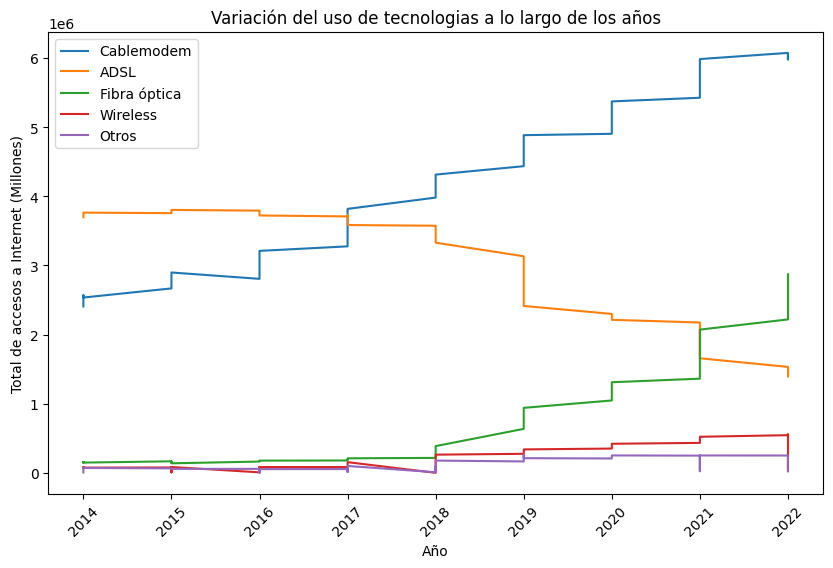

In [6]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico según sea necesario
plt.plot(accesos_tecnologia['Año'], accesos_tecnologia['Cablemodem'], label='Cablemodem')
plt.plot(accesos_tecnologia['Año'], accesos_tecnologia['ADSL'], label='ADSL')
plt.plot(accesos_tecnologia['Año'], accesos_tecnologia['Fibra óptica'], label='Fibra óptica')
plt.plot(accesos_tecnologia['Año'], accesos_tecnologia['Wireless'], label='Wireless')
plt.plot(accesos_tecnologia['Año'], accesos_tecnologia['Otros'], label='Otros')
plt.xlabel('Año')
plt.ylabel('Total de accesos a Internet (Millones)')
plt.title('Variación del uso de tecnologias a lo largo de los años')
plt.xticks(rotation=45)
plt.legend()  # Mostrar leyenda con las etiquetas de las tecnologías
plt.show()

**Al observar la descripcion estadistica y el grafico de linea donde encontramos los tipos de accesos a internet a nivel nacional, podemos evidenciar un claro aumento del uso de Cablemodem y un descenso de la tecnologia ADSL. Ademas, en los ultimos años se observa un crecimiento notorio en la tecnologia de Fibra Óptica, la cual es muy buena para mayores velocidad de internet.**

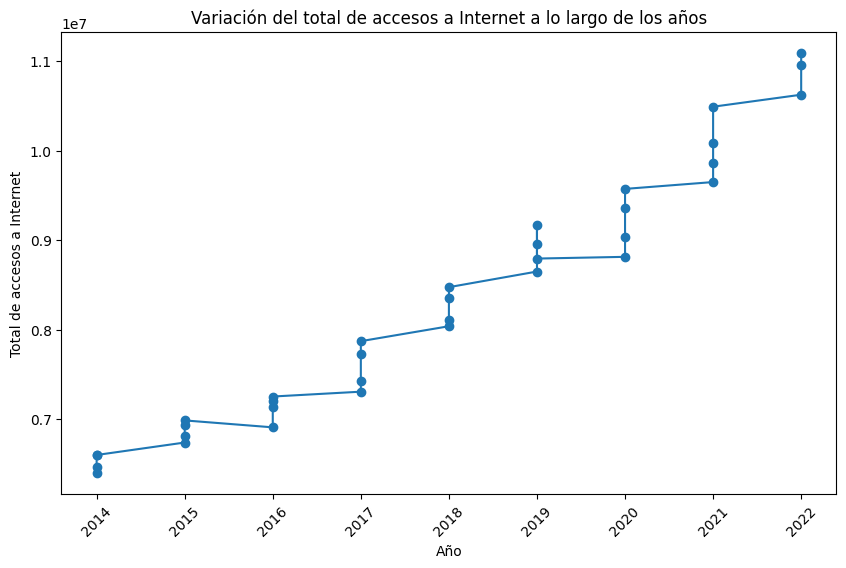

In [9]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico según sea necesario
plt.plot(accesos_tecnologia['Año'], accesos_tecnologia['Total'], marker='o')
plt.xlabel('Año')
plt.ylabel('Total de accesos a Internet')
plt.title('Variación del total de accesos a Internet a lo largo de los años')
plt.xticks(rotation=45)
plt.show()

**Observamos a traves de este grafico de linea que el acceso a internet va aumentando a medida que pasan los años, esto se puede deber a la revolucion digital de hoy en dia donde existen redes sociales, comercios, educacion y trabajo por internet, entre otras.**  
**Aclaracion: 0.7 se refiere a 7.000.000 (siete millones) y asi con los demas numeros del eje Y**

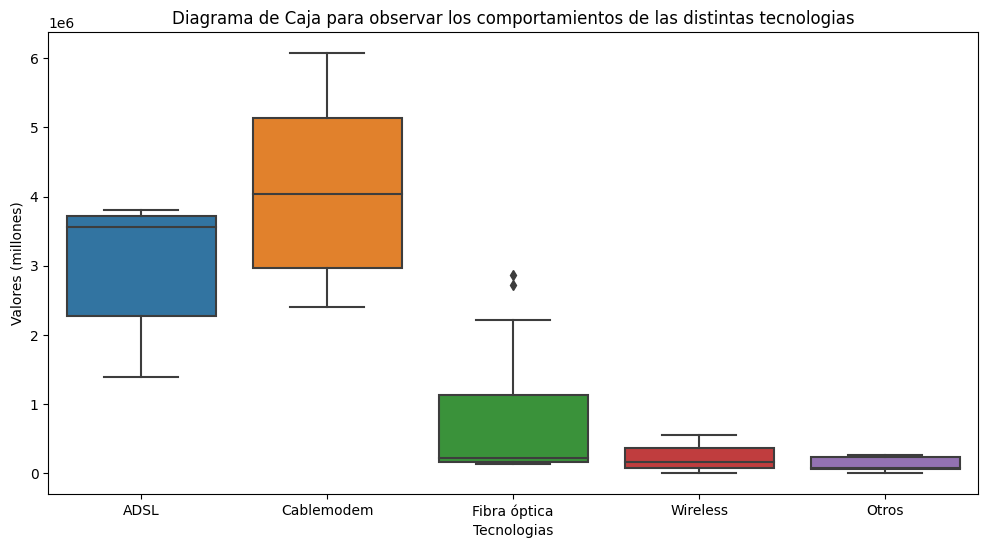

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=accesos_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']], ax=ax)
ax.set_xlabel('Tecnologias')
ax.set_ylabel('Valores (millones)')
ax.set_title('Diagrama de Caja para observar los comportamientos de las distintas tecnologias')
plt.show()

In [7]:
Q1 = accesos_tecnologia['Fibra óptica'].quantile(0.25)
Q3 = accesos_tecnologia['Fibra óptica'].quantile(0.75)
IQR = Q3 - Q1

outliers = accesos_tecnologia[(accesos_tecnologia['Fibra óptica'] < Q1 - 1.5 * IQR) | (accesos_tecnologia['Fibra óptica'] > Q3 + 1.5 * IQR)]

outliers = outliers[['Año', 'Trimestre', 'Fibra óptica']]
outliers

,Año,Trimestre,Fibra óptica
0,2022,3,2871541
1,2022,2,2723285


**Vemos que hay 2 outliers en la columna Fibra óptica que son los 2 ultimos registros ingresados. Esto se puede deber a lo anteriormente comentado acerca de la capacidad de poder ofrecer mayores velocidades de internet.**

## Tecnologias por Localidad.  

**En este CSV se pueden observar la cantidad de partidos que tienen acceso a determinada tecnologia que les permite tener acceso a internet.**

In [9]:
tecnologias_localidad.head()

,Provincia,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL,Localidad
0,Buenos Aires,355,345,213,443,655,590,548,497,157,888
1,Capital Federal,48,48,48,48,48,48,48,48,48,48
2,Catamarca,7,3,1,23,57,29,31,33,48,167
3,Chaco,28,14,1,45,75,44,47,46,43,92
4,Chubut,13,11,15,13,38,31,54,31,49,90


In [12]:
tecnologias_localidad.describe()

,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL,Localidad
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,47.21,36.50,16.79,60.25,107.25,78.33,90.08,93.42,44.96,176.29
std,80.11,72.23,43.30,90.69,141.05,124.33,122.77,108.71,32.32,189.68
min,3.00,1.00,0.00,2.00,6.00,5.00,3.00,3.00,4.00,16.00
25%,12.25,8.50,1.00,18.25,41.75,28.00,39.00,44.25,21.25,86.25
50%,20.50,14.50,3.50,41.50,61.00,40.50,49.50,56.00,43.50,127.50
75%,30.50,22.75,13.50,48.50,89.50,58.75,62.25,82.00,61.50,173.00
max,355.00,345.00,213.00,443.00,655.00,590.00,548.00,497.00,157.00,888.00


**Basandonos en la media podemos decir que la tecnologia que mas se consuma es 4G aunque esta no pertenece a la categoria de intrnet fijo ya que es para comunicaciones inalambricas para redes móviles de datos de alta velocidad. En en cuanto a los servicios de internet fijo visualizamos que telefonia fija es la que mas predomina.**

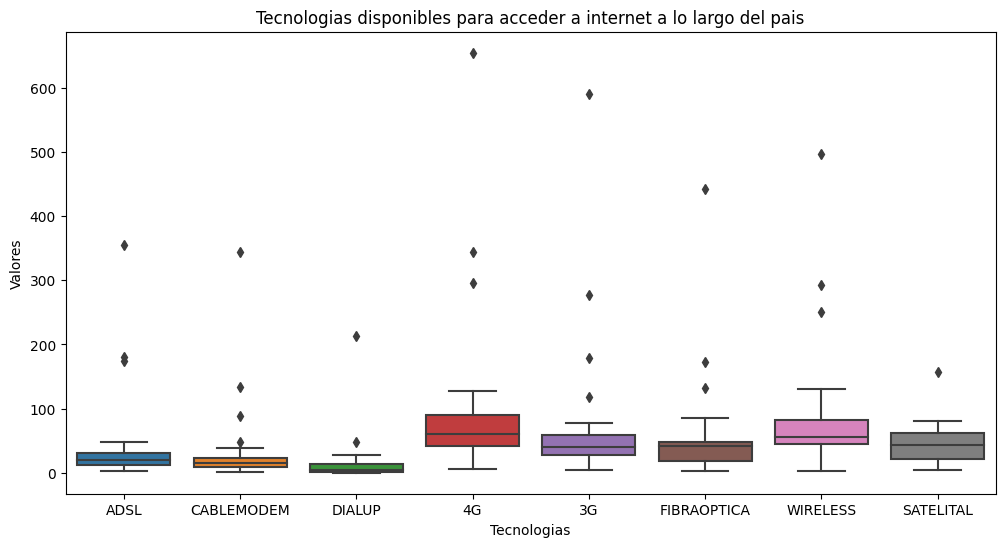

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=tecnologias_localidad[['ADSL', 'CABLEMODEM', 'DIALUP', '4G', '3G', 'FIBRAOPTICA', 'WIRELESS', 'SATELITAL']], ax=ax)
ax.set_xlabel('Tecnologias')
ax.set_ylabel('Valores')
ax.set_title('Tecnologias disponibles para acceder a internet a lo largo del pais')
plt.show()

**Se ven outliers en todas las columnas sobre tipos de tecnologias, podemos decir que en caso de no ser errores, son valores dados por la diferencia de cantidades de partidos entre provincias.**

## Velocidad Media de bajada a nivel Nacional

In [11]:
velocidad_avg_bajada.head()

,Año,Trimestre,Media_Mbps,Periodo
0,2022,3,62.46,Jul-Sept 2022
1,2022,2,58.44,Abr-Jun 2022
2,2022,1,55.11,Ene-Mar 2022
3,2021,4,52.34,Oct-Dic 2021
4,2021,3,48.46,Jul-Sept 2021


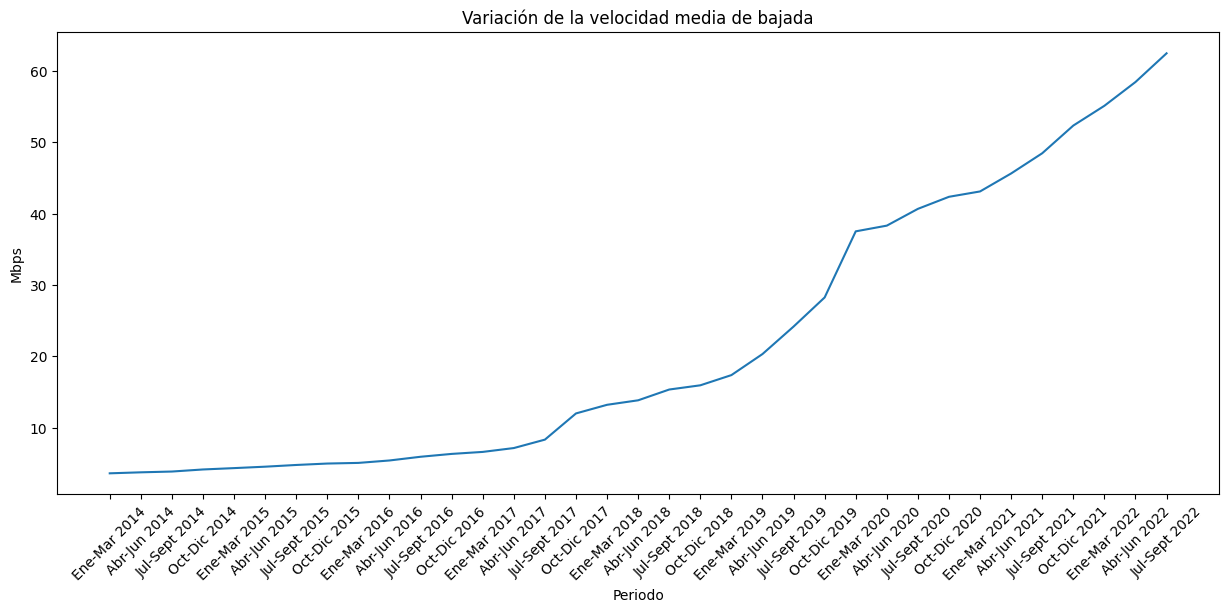

In [14]:
plt.figure(figsize=(15, 6))  # Ajustar el tamaño del gráfico según sea necesario
plt.plot(velocidad_avg_bajada['Periodo'], velocidad_avg_bajada['Media_Mbps'], label='Media_Mbps')
plt.xlabel('Periodo')
plt.ylabel('Mbps')
plt.title('Variación de la velocidad media de bajada')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.show()

**Se observa mediante este grafico un aumento de la valocidad media de bajada a medida que transcurren los años.**

## Internet Fijo en las Provincias de Argentina

In [19]:
internetfijo_prov.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Banda ancha fija,Dial up,Total,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
0,2022,3,Buenos Aires,78.11,4715469,6.199,4721668,29985,27709,290315,297915,267044,12419,3618689,65821
1,2022,3,Capital Federal,122.28,1545534,2.145,1547679,5170,5742,34371,67829,51946,28692,1253105,105477
2,2022,3,Catamarca,65.33,70292,1,70293,710,3840,3107,5389,5099,3737,50298,2208
3,2022,3,Chaco,43.86,144141,5,144146,4610,9870,16782,18938,8049,15828,79390,3711
4,2022,3,Chubut,84.38,164874,904,165778,1090,1444,45707,3094,34682,15309,17563,20024


In [20]:
internetfijo_prov.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Banda ancha fija,Total,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
count,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00
mean,2017.89,2.46,49.07,344767.38,345741.69,2898.44,10374.47,150969.97,33783.19,34638.14,19442.94,79179.56,4898.22
std,2.53,1.11,23.15,740050.30,741943.58,10900.55,21587.79,348153.84,60759.30,87389.35,70347.38,342623.37,12102.99
min,2014.00,1.00,9.35,12193.00,12557.00,60.00,0.00,2842.00,0.00,0.00,0.00,0.00,-1945.00
25%,2016.00,1.00,32.11,51922.25,52029.75,320.00,1347.00,28539.25,2967.75,2039.50,190.00,7.00,0.00
50%,2018.00,2.00,45.90,102936.00,103489.50,1050.00,3760.50,48834.50,8303.50,7766.00,2214.50,882.50,0.00
75%,2020.00,3.00,61.87,177868.50,177914.75,2565.75,8328.25,86897.50,29956.00,24396.50,9284.00,19660.75,5094.00
max,2022.00,4.00,124.06,4715469.00,4721668.00,199768.00,171244.00,2299705.00,403575.00,886678.00,949093.00,3618689.00,120464.00


**En esta estadistica descriptiva podemos deducir que en el año 2014 ningun usuario tenia un internet con mas de 6 Mbps, y a medida que los años transcurrieron los Mbps fueron aumentando superando los 30 Mbps.**

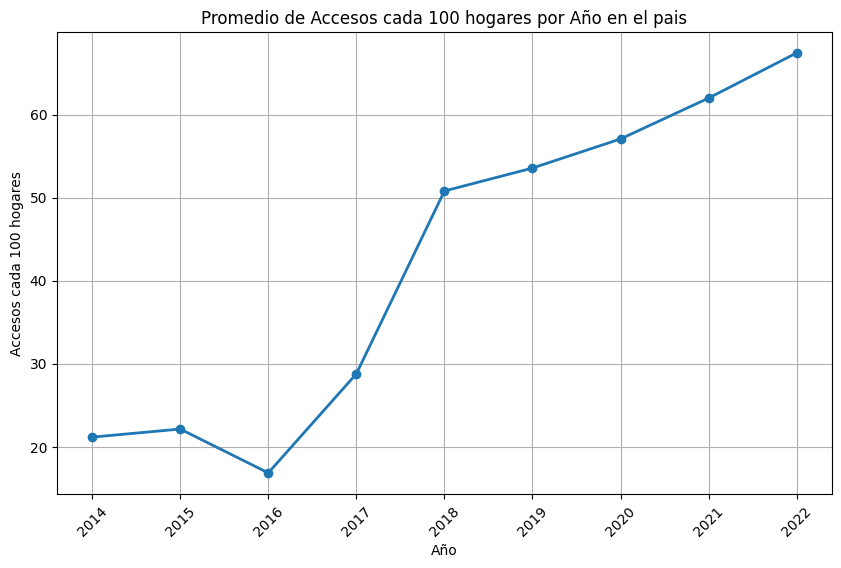

In [30]:
promedio_por_año = internetfijo_prov.groupby('Año')['Accesos por cada 100 hogares'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico según sea necesario
plt.plot(promedio_por_año.index, promedio_por_año.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Año')
plt.ylabel('Accesos cada 100 hogares')
plt.title('Promedio de Accesos cada 100 hogares por Año en el pais')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

**Podemos observar que a medida que transcurren los años, mas personas tienen acceso a internet en sus hogares.**

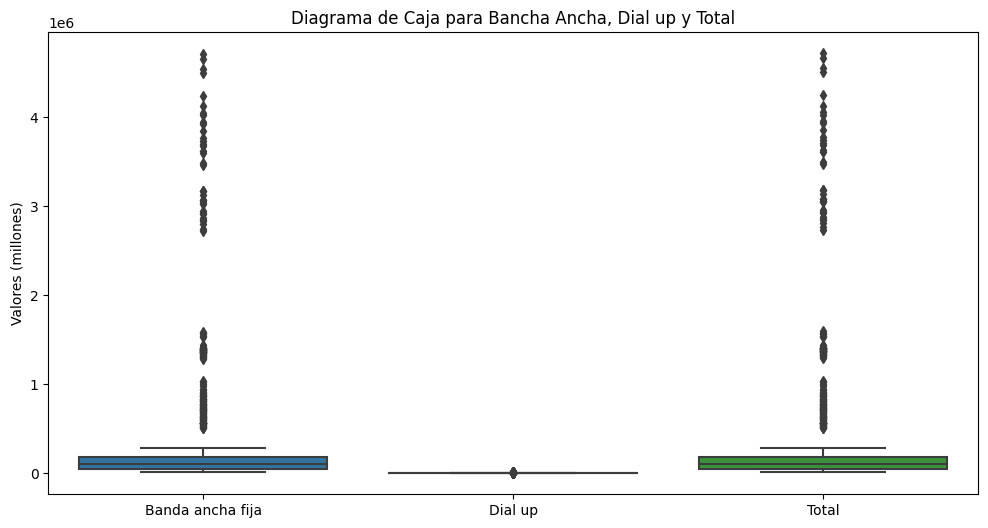

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=internetfijo_prov[['Banda ancha fija', 'Dial up', 'Total']], ax=ax)
ax.set_ylabel('Valores (millones)')
ax.set_title('Diagrama de Caja para Bancha Ancha, Dial up y Total')
plt.show()

In [23]:
Q1 = internetfijo_prov['Banda ancha fija'].quantile(0.25)
Q3 = internetfijo_prov['Banda ancha fija'].quantile(0.75)
IQR = Q3 - Q1

outliers = internetfijo_prov[(internetfijo_prov['Banda ancha fija'] < Q1 - 1.5 * IQR) | (internetfijo_prov['Banda ancha fija'] > Q3 + 1.5 * IQR)]

outliers = outliers[['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Total']]
outliers.head(10)

,Año,Trimestre,Provincia,Banda ancha fija,Total
0,2022,3,Buenos Aires,4715469,4721668
1,2022,3,Capital Federal,1545534,1547679
5,2022,3,Córdoba,1038600,1038668
20,2022,3,Santa Fe,887700,887810
24,2022,2,Buenos Aires,4660984,4667183
25,2022,2,Capital Federal,1534626,1536771
29,2022,2,Córdoba,1026367,1026435
44,2022,2,Santa Fe,878749,878859
48,2022,1,Buenos Aires,4549131,4555424
49,2022,1,Capital Federal,1415378,1417541


**Dada la similitud de ouliers en las columnas Banda ancha fija y Total, visualizamos outliers de una columna y deducimos que no son errores, sino datos equivalentes a la cantidad de personas que tiene cada Provincia.**

## Ingresos del Internet

In [35]:
ingresos_internet.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Dolar Oficial,Ingresos usd
0,2022,3,67055930,Jul-Sept 2022,141,473275
1,2022,2,60335724,Abr-Jun 2022,122,490808
2,2022,1,55589997,Ene-Mar 2022,111,497759
3,2021,4,45467887,Oct-Dic 2021,105,430465
4,2021,3,42999944,Jul-Sept 2021,102,420269


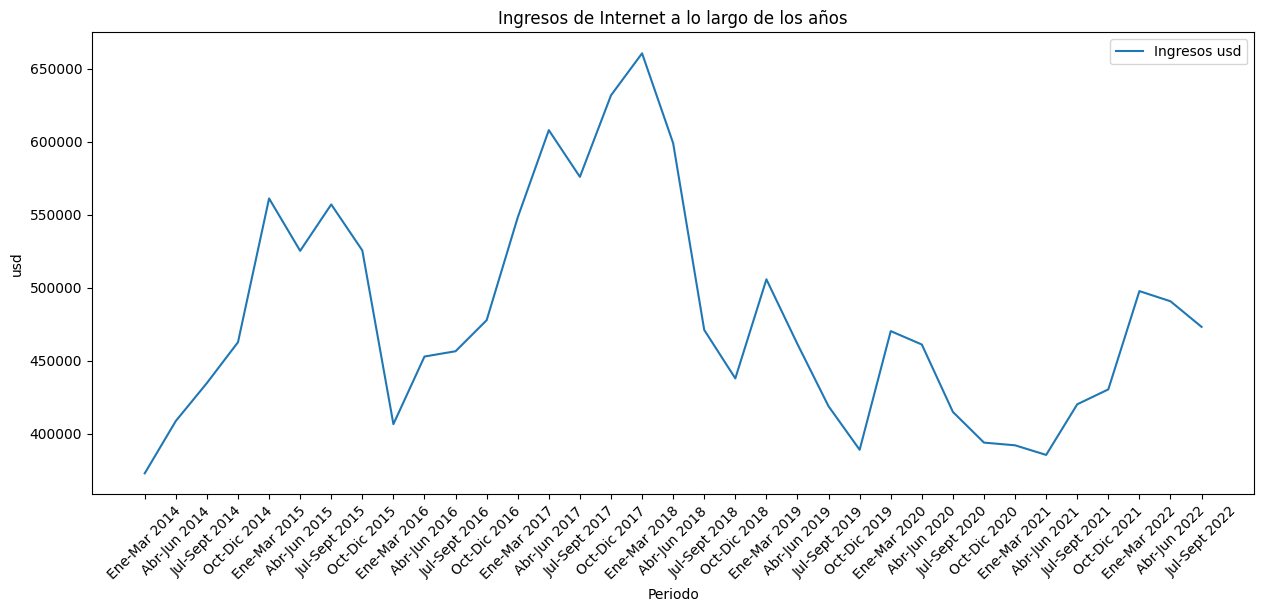

In [25]:
plt.figure(figsize=(15, 6))  # Ajustar el tamaño del gráfico según sea necesario
plt.plot(ingresos_internet['Periodo'], ingresos_internet['Ingresos usd'], label='Ingresos usd')
plt.xlabel('Periodo')
plt.ylabel('usd')
plt.title('Ingresos de Internet a lo largo de los años')
plt.xticks(rotation=45)
plt.legend()  # Mostrar leyenda con las etiquetas de las tecnologías
plt.gca().invert_xaxis()
plt.show()

**Se observan fluctuaciones en los ingresos por periodos, esto puede ser por distintos contextos como economia del pais.**